In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('covid_19_india.csv')

In [61]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [62]:
## Check number of rows and columns
df.shape

(18110, 9)

In [63]:
## View last few rows of the dataset
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [64]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [65]:
# Summary statistics using .describe()
df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [66]:
df.describe(include='object')

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
count,18110,18110,18110,18110,18110
unique,560,7,46,62,12
top,2020-06-11,8:00 AM,Kerala,-,-
freq,37,16472,560,17664,17664


In [67]:
# Checking if missing data or null values are present in the dataset
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [68]:
# Renaming columns according to snake casing for better readability and documentation
df.columns = df.columns.str.lower()

In [69]:
df.columns

Index(['sno', 'date', 'time', 'state/unionterritory',
       'confirmedindiannational', 'confirmedforeignnational', 'cured',
       'deaths', 'confirmed'],
      dtype='object')

In [70]:
# Drop unnecessary columns
df = df.drop(['sno', 'time'], axis = 1)


In [71]:
df

,date,state/unionterritory,confirmedindiannational,confirmedforeignnational,cured,deaths,confirmed
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1
2,2020-02-01,Kerala,2,0,0,0,2
3,2020-02-02,Kerala,3,0,0,0,3
4,2020-02-03,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...
18105,2021-08-11,Telangana,-,-,638410,3831,650353
18106,2021-08-11,Tripura,-,-,77811,773,80660
18107,2021-08-11,Uttarakhand,-,-,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,-,-,1685492,22775,1708812


In [72]:
df.head(2)

,date,state/unionterritory,confirmedindiannational,confirmedforeignnational,cured,deaths,confirmed
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1


In [101]:
# Check unique state names
df['state_ut'].unique()


array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [104]:
# Fix incorrect state names
df['state_ut'] = df['state_ut'].replace({
    'Bihar****': 'Bihar',
    'Madhya Pradesh***': 'Madhya Pradesh',
    'Maharashtra***': 'Maharashtra'
})


In [124]:
# State-wise total confirmed cases
state_total_cases = df.groupby('state_ut')['confirmed'].max().count()
state_total_cases

43

In [105]:
# The dataset has daily cumulative records for each state.
# To avoid double counting, the maximum confirmed cases per state is used.


#total cases state-wise
state_wise_total = (
    df.groupby('state_ut')['confirmed'].max().reset_index()
)

state_wise_total


,state_ut,confirmed
0,Andaman and Nicobar Islands,7548
1,Andhra Pradesh,1985182
2,Arunachal Pradesh,50605
3,Assam,576149
4,Bihar,725279
5,Cases being reassigned to states,9265
6,Chandigarh,61992
7,Chhattisgarh,1003356
8,Dadra and Nagar Haveli,10377
9,Dadra and Nagar Haveli and Daman and Diu,10654


In [106]:
#State-wise total deaths
state_wise_deaths = (df.groupby('state_ut')['deaths'].max().reset_index())
state_wise_deaths

,state_ut,deaths
0,Andaman and Nicobar Islands,129
1,Andhra Pradesh,13564
2,Arunachal Pradesh,248
3,Assam,5420
4,Bihar,9646
5,Cases being reassigned to states,0
6,Chandigarh,811
7,Chhattisgarh,13544
8,Dadra and Nagar Haveli,4
9,Dadra and Nagar Haveli and Daman and Diu,4


In [107]:
#Top 10 states wise deaths
top10_deaths = state_wise_deaths.sort_values(
    by='deaths', ascending=False
).head(10)

top10_deaths

,state_ut,deaths
25,Maharashtra,134201
20,Karnataka,36848
19,Karanataka,36197
35,Tamil Nadu,34367
11,Delhi,25068
40,Uttar Pradesh,22775
42,West Bengal,18252
21,Kerala,18004
32,Punjab,16322
1,Andhra Pradesh,13564


In [81]:
#Total confirmed cases (overall)
df['confirmed'].max()


6363442

In [82]:
#Total deaths (overall)
df['deaths'].max()

134201

In [83]:
#Total recovered cases (overall)
df['cured'].max()

6159676

In [109]:
# Top 5 states by confirmed cases
top5 = (
    state_wise_total
    .sort_values(by='confirmed', ascending=False)
    .head()
)
top5


,state_ut,confirmed
25,Maharashtra,6363442
21,Kerala,3586693
20,Karnataka,2921049
19,Karanataka,2885238
35,Tamil Nadu,2579130


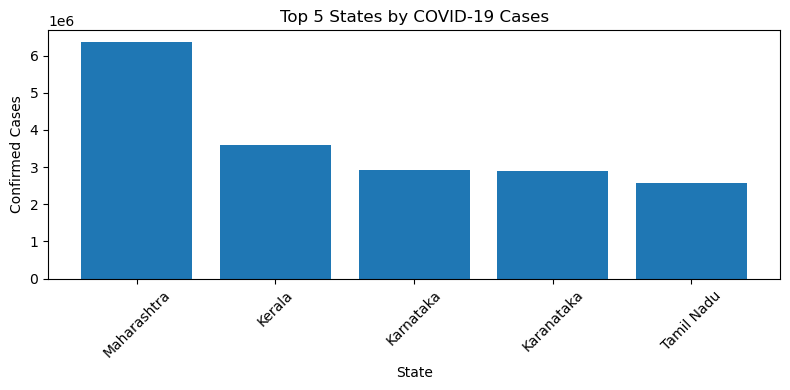

In [110]:
# Bar chart for top 5 states by confirmed cases
plt.figure(figsize=(8,4))
plt.bar(top5['state_ut'], top5['confirmed'])
plt.title('Top 5 States by COVID-19 Cases')
plt.xlabel('State')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Note: Some states appear more than once due to inconsistent naming in the original dataset.


In [111]:
# State-wise recovered cases were calculated using the maximum value
# of the 'cured' column for each state.

# Recovery by State

state_wise_recovered = (
    df.groupby('state_ut')['cured']
      .max()
      .reset_index()
)

state_wise_recovered




,state_ut,cured
0,Andaman and Nicobar Islands,7412
1,Andhra Pradesh,1952736
2,Arunachal Pradesh,47821
3,Assam,559684
4,Bihar,715352
5,Cases being reassigned to states,0
6,Chandigarh,61150
7,Chhattisgarh,988189
8,Dadra and Nagar Haveli,10261
9,Dadra and Nagar Haveli and Daman and Diu,10646


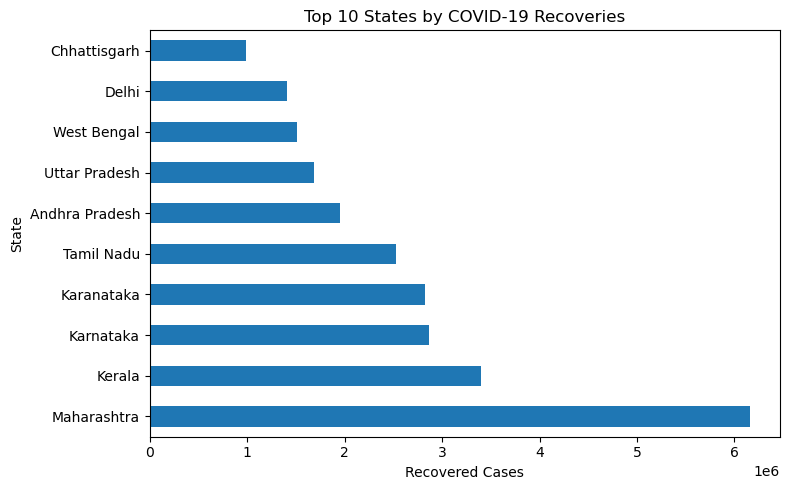

In [112]:
# State-wise recovered cases
state_recovered = df.groupby('state_ut')['cured'].max()

# Top 10 states by recoveries
top10_recovered = state_recovered.sort_values(ascending=False).head(10)

# Horizontal bar chart
plt.figure(figsize=(8,5))
top10_recovered.plot(kind='barh')
plt.title('Top 10 States by COVID-19 Recoveries')
plt.xlabel('Recovered Cases')
plt.ylabel('State')
plt.tight_layout()
plt.show()


In [113]:
#Daily trends of confirmed cases
df['date'] = pd.to_datetime(df['date'])
daily_cases = df.groupby('date')['confirmed'].max()


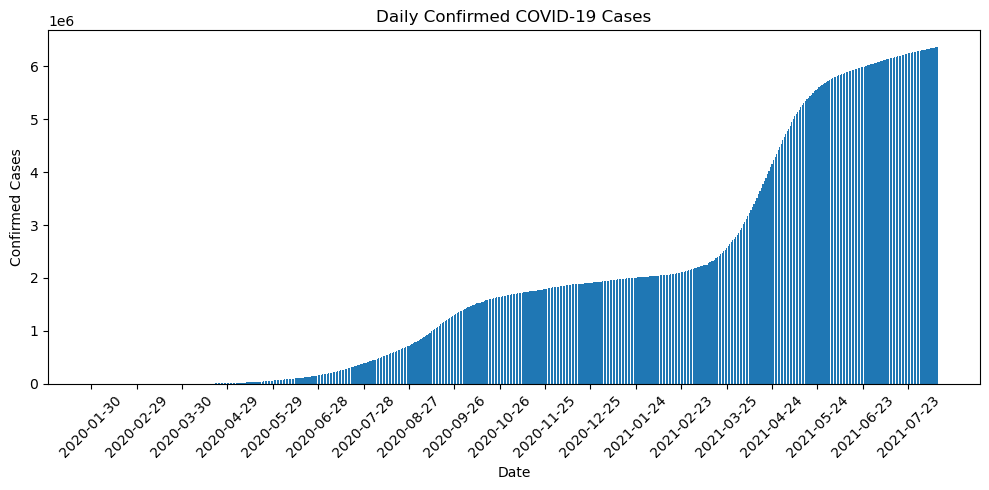

In [120]:
plt.figure(figsize=(10,5))
plt.bar(daily_cases.index, daily_cases.values)
plt.title('Daily Confirmed COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')

# show fewer date labels
plt.xticks(daily_cases.index[::30], rotation=45)

plt.tight_layout()
plt.show()



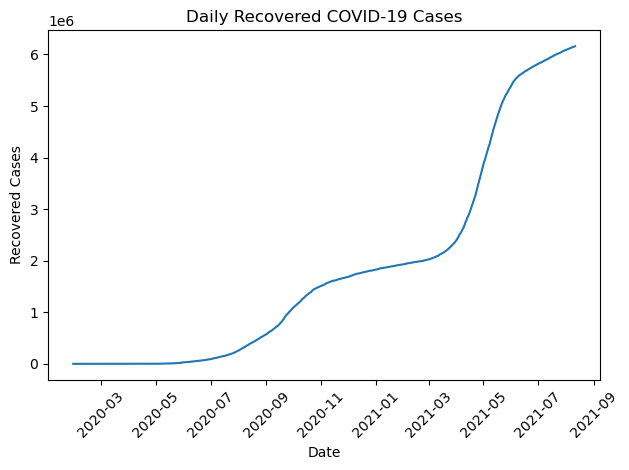

In [121]:
# Daily recovery cases : 
# This graph shows the daily trend of recovered COVID-19 cases over time
df['date'] = pd.to_datetime(df['date'])
daily_recovered = df.groupby('date')['cured'].max()

plt.plot(daily_recovered)
plt.title('Daily Recovered COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Recovered Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




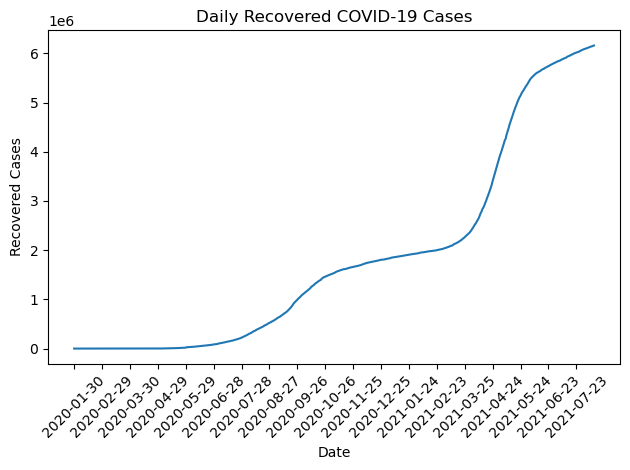

In [122]:
# daily deaths trend
df['date'] = pd.to_datetime(df['date'])
daily_deaths = df.groupby('date')['deaths'].max()

plt.plot(daily_recovered)
plt.title('Daily Recovered COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Recovered Cases')
plt.xticks(daily_recovered.index[::30], rotation=45)  # har 30 din
plt.tight_layout()
plt.show()




In [123]:
'''
Conclusion:
This exploratory data analysis examined the spread of COVID-19 across Indian states.
State-wise analysis highlighted regions with the highest confirmed, recovered, and death cases.
Daily trends showed a steady increase in cumulative cases over time.
Simple visualizations were used to understand patterns and compare states effectively.

'''


'\nConclusion:\nThis exploratory data analysis examined the spread of COVID-19 across Indian states.\nState-wise analysis highlighted regions with the highest confirmed, recovered, and death cases.\nDaily trends showed a steady increase in cumulative cases over time.\nSimple visualizations were used to understand patterns and compare states effectively.\n\n'